# 1. Libraries

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# For ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For various models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# For Hyperparameter 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 2. Import Datasets

In [51]:
#Import yaml 
#try:
   # with open("../config.yaml", "r") as file:
        #config = yaml.safe_load(file)
#except:
    #print("The configuration file was not found!")

In [54]:
df = pd.read_csv(r"C:\Users\chuan\Desktop\Ironhack\Week 7 Machine Learning\Weekly Project\data\raw\german_credit_risk.csv")

df.head()

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad

# 3. Data cleaning and wrangling

In [55]:
# 1. Drop irrelavant columns 
df_1 = df.drop(columns=['Saving accounts', 'Checking account'])

# 2. Check missing values --> No missing values 
#df_1.isnull().sum()

#df_1

# 4. Classify categorical and numerical 

In [56]:
# 4.1 Extracting columns with object data types to create a categorical dataframe
df_1_categorical = df_1.select_dtypes("object")
df_1_numerical = df_1.select_dtypes("number")

In [57]:
# 4.2 display numerical  
df_1_numerical # Age, Job, Credit amount, Duration --> minmax

Unnamed: 0  Age  Job  Credit amount  Duration
0             0   67    2           1169         6
1             1   22    2           5951        48
2             2   49    1           2096        12
3             3   45    2           7882        42
4             4   53    2           4870        24
..          ...  ...  ...            ...       ...
995         995   31    1           1736        12
996         996   40    3           3857        30
997         997   38    2            804        12
998         998   23    2           1845        45
999         999   27    2           4576        45

[1000 rows x 5 columns]

In [58]:
# 4.3 display categorical 
df_1_categorical # Sex, Housing, Purpose, Risk --> dummy 

Sex Housing              Purpose  Risk
0      male     own             radio/TV  good
1    female     own             radio/TV   bad
2      male     own            education  good
3      male    free  furniture/equipment  good
4      male    free                  car   bad
..      ...     ...                  ...   ...
995  female     own  furniture/equipment  good
996    male     own                  car  good
997    male     own             radio/TV  good
998    male    free             radio/TV   bad
999    male     own                  car  good

[1000 rows x 4 columns]

# 5. Convert categorical to numerical 

In [59]:
# 5.1 classification 
# Nominal: Sex, Housing, Purpose, Risk
# Ordinal: No

In [60]:
# 5.2 Dummify the nominal columns 

categorical_columns = ['Sex', 'Housing', 'Purpose']

# Create dummy variables for each categorical column
df_dummies = pd.get_dummies(df_1_categorical[categorical_columns])

# Concatenate the dummy variables with the original DataFrame
df_encoded = pd.concat([df_1, df_dummies], axis=1)

# Drop the original categorical columns (if desired)
df_encoded.drop(df_1_categorical[categorical_columns], axis=1, inplace=True)

boolean_columns = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[boolean_columns] = df_encoded[boolean_columns].astype(int)

df_encoded

Unnamed: 0  Age  Job  Credit amount  Duration  Risk  Sex_female  \
0             0   67    2           1169         6  good           0   
1             1   22    2           5951        48   bad           1   
2             2   49    1           2096        12  good           0   
3             3   45    2           7882        42  good           0   
4             4   53    2           4870        24   bad           0   
..          ...  ...  ...            ...       ...   ...         ...   
995         995   31    1           1736        12  good           1   
996         996   40    3           3857        30  good           0   
997         997   38    2            804        12  good           0   
998         998   23    2           1845        45   bad           0   
999         999   27    2           4576        45  good           0   

     Sex_male  Housing_free  Housing_own  Housing_rent  Purpose_business  \
0           1             0            1             0                 0   
1           0             0            1             0                 0   
2           1             0            1             0                 0   
3           1             1            0             0                 0   
4           1             1            0             0                 0   
..        ...           ...          ...           ...               ...   
995         0             0            1             0                 0   
996         1             0            1             0                 0   
997         1             0            1             0                 0   
998         1             1            0             0                 0   
999         1             0            1             0                 0   

     Purpose_car  Purpose_domestic appliances  Purpose_education  \
0              0                            0                  0   
1              0                            0                  0   
2              0                            0                  1   
3              0                            0                  0   
4              1                            0                  0   
..           ...                          ...                ...   
995            0                            0                  0   
996            1                            0                  0   
997            0                            0                  0   
998            0                            0                  0   
999            1                            0                  0   

     Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  \
0                              0                 1                0   
1                              0                 1                0   
2                              0                 0                0   
3                              1                 0                0   
4                              0                 0                0   
..                           ...               ...              ...   
995                            1                 0                0   
996                            0                 0                0   
997                            0                 1                0   
998                            0                 1                0   
999                            0                 0                0   

     Purpose_vacation/others  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
..                       ...  
995                        0  
996                        0  
997                        0  
998                        0  
999                        0  

[1000 rows x 19 columns]

# 6. Perform Train Test Split

In [97]:
# Encode the target variable using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_encoded['Risk'] = label_encoder.fit_transform(df_encoded['Risk'])

# Separate features and target
features = df_encoded.drop(columns=['Risk', 'Unnamed: 0'])
target = df_encoded['Risk']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

X_train

Age  Job  Credit amount  Duration  Sex_female  Sex_male  Housing_free  \
687   30    2           2862        36           0         1             1   
500   27    2           3123        24           1         0             0   
332   24    3           7408        60           1         0             0   
979   25    2           1264        15           0         1             0   
817   24    2           1554         6           1         0             0   
..   ...  ...            ...       ...         ...       ...           ...   
835   48    2           1082        12           0         1             0   
192   36    2           3915        27           0         1             0   
629   64    1           3832         9           0         1             0   
559   31    1           1928        18           0         1             0   
684   31    1           9857        36           0         1             0   

     Housing_own  Housing_rent  Purpose_business  Purpose_car  \
687            0             0                 0            1   
500            1             0                 0            1   
332            1             0                 0            1   
979            0             1                 0            1   
817            0             1                 0            0   
..           ...           ...               ...          ...   
835            1             0                 0            1   
192            1             0                 1            0   
629            1             0                 0            0   
559            1             0                 0            0   
684            1             0                 1            0   

     Purpose_domestic appliances  Purpose_education  \
687                            0                  0   
500                            0                  0   
332                            0                  0   
979                            0                  0   
817                            0                  0   
..                           ...                ...   
835                            0                  0   
192                            0                  0   
629                            0                  1   
559                            0                  0   
684                            0                  0   

     Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  \
687                            0                 0                0   
500                            0                 0                0   
332                            0                 0                0   
979                            0                 0                0   
817                            0                 1                0   
..                           ...               ...              ...   
835                            0                 0                0   
192                            0                 0                0   
629                            0                 0                0   
559                            1                 0                0   
684                            0                 0                0   

     Purpose_vacation/others  
687                        0  
500                        0  
332                        0  
979                        0  
817                        0  
..                       ...  
835                        0  
192                        0  
629                        0  
559                        0  
684                        0  

[800 rows x 17 columns]

# 7. Feature scaling for numerical columns --> by using minmaxscaler

In [62]:
# 7.1 Import and fit normalizer 
normalizer = MinMaxScaler()
normalizer.fit(X_train)

MinMaxScaler()

In [63]:
# 7.2 Converting normalisation for numerical columns 
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [64]:
# display
X_train_norm

array([[0.19642857, 0.66666667, 0.1437218 , ..., 0.        , 0.        ,
        0.        ],
       [0.14285714, 0.66666667, 0.15808298, ..., 0.        , 0.        ,
        0.        ],
       [0.08928571, 1.        , 0.39385936, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.80357143, 0.33333333, 0.19709475, ..., 0.        , 0.        ,
        0.        ],
       [0.21428571, 0.33333333, 0.0923297 , ..., 0.        , 0.        ,
        0.        ],
       [0.21428571, 0.33333333, 0.5286123 , ..., 0.        , 0.        ,
        0.        ]])

In [65]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns, index= X_train.index)
X_train_norm.head()

Age       Job  Credit amount  Duration  Sex_female  Sex_male  \
687  0.196429  0.666667       0.143722  0.470588         0.0       1.0   
500  0.142857  0.666667       0.158083  0.294118         1.0       0.0   
332  0.089286  1.000000       0.393859  0.823529         1.0       0.0   
979  0.107143  0.666667       0.055794  0.161765         0.0       1.0   
817  0.089286  0.666667       0.071751  0.029412         1.0       0.0   

     Housing_free  Housing_own  Housing_rent  Purpose_business  Purpose_car  \
687           1.0          0.0           0.0               0.0          1.0   
500           0.0          1.0           0.0               0.0          1.0   
332           0.0          1.0           0.0               0.0          1.0   
979           0.0          0.0           1.0               0.0          1.0   
817           0.0          0.0           1.0               0.0          0.0   

     Purpose_domestic appliances  Purpose_education  \
687                          0.0                0.0   
500                          0.0                0.0   
332                          0.0                0.0   
979                          0.0                0.0   
817                          0.0                0.0   

     Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  \
687                          0.0               0.0              0.0   
500                          0.0               0.0              0.0   
332                          0.0               0.0              0.0   
979                          0.0               0.0              0.0   
817                          0.0               1.0              0.0   

     Purpose_vacation/others  
687                      0.0  
500                      0.0  
332                      0.0  
979                      0.0  
817                      0.0

In [66]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns, index= X_test.index)
X_test_norm.head()

Age       Job  Credit amount  Duration  Sex_female  Sex_male  \
993  0.196429  1.000000       0.204083  0.470588         0.0       1.0   
859  0.125000  0.666667       0.183064  0.073529         0.0       1.0   
298  0.428571  0.666667       0.124629  0.205882         0.0       1.0   
553  0.142857  0.666667       0.096016  0.117647         0.0       1.0   
672  0.410714  1.000000       0.556619  0.823529         0.0       1.0   

     Housing_free  Housing_own  Housing_rent  Purpose_business  Purpose_car  \
993           0.0          1.0           0.0               0.0          0.0   
859           0.0          0.0           1.0               0.0          1.0   
298           0.0          1.0           0.0               0.0          0.0   
553           0.0          1.0           0.0               0.0          1.0   
672           0.0          1.0           0.0               0.0          1.0   

     Purpose_domestic appliances  Purpose_education  \
993                          0.0                0.0   
859                          0.0                0.0   
298                          0.0                0.0   
553                          0.0                0.0   
672                          0.0                0.0   

     Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  \
993                          1.0               0.0              0.0   
859                          0.0               0.0              0.0   
298                          1.0               0.0              0.0   
553                          0.0               0.0              0.0   
672                          0.0               0.0              0.0   

     Purpose_vacation/others  
993                      0.0  
859                      0.0  
298                      0.0  
553                      0.0  
672                      0.0

# 8. Supervised Machine learning Models

# 8.1 KNN

In [67]:
# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=3)

In [68]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [69]:
pred = knn.predict(X_test)
pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1])

In [70]:
y_test.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1])

In [71]:
print(f"The accuracy of the model is {knn.score(X_test, y_test)*100: .2f}%")

The accuracy of the model is  63.00%


# 8.2 Decision Tree 

In [72]:
#Instantiate the model
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)

In [73]:
# Train the model

tree.fit(X_train_norm, y_train)

DecisionTreeRegressor(max_depth=10)

In [74]:
X_train_norm

Age       Job  Credit amount  Duration  Sex_female  Sex_male  \
687  0.196429  0.666667       0.143722  0.470588         0.0       1.0   
500  0.142857  0.666667       0.158083  0.294118         1.0       0.0   
332  0.089286  1.000000       0.393859  0.823529         1.0       0.0   
979  0.107143  0.666667       0.055794  0.161765         0.0       1.0   
817  0.089286  0.666667       0.071751  0.029412         1.0       0.0   
..        ...       ...            ...       ...         ...       ...   
835  0.517857  0.666667       0.045780  0.117647         0.0       1.0   
192  0.303571  0.666667       0.201662  0.338235         0.0       1.0   
629  0.803571  0.333333       0.197095  0.073529         0.0       1.0   
559  0.214286  0.333333       0.092330  0.205882         0.0       1.0   
684  0.214286  0.333333       0.528612  0.470588         0.0       1.0   

     Housing_free  Housing_own  Housing_rent  Purpose_business  Purpose_car  \
687           1.0          0.0           0.0               0.0          1.0   
500           0.0          1.0           0.0               0.0          1.0   
332           0.0          1.0           0.0               0.0          1.0   
979           0.0          0.0           1.0               0.0          1.0   
817           0.0          0.0           1.0               0.0          0.0   
..            ...          ...           ...               ...          ...   
835           0.0          1.0           0.0               0.0          1.0   
192           0.0          1.0           0.0               1.0          0.0   
629           0.0          1.0           0.0               0.0          0.0   
559           0.0          1.0           0.0               0.0          0.0   
684           0.0          1.0           0.0               1.0          0.0   

     Purpose_domestic appliances  Purpose_education  \
687                          0.0                0.0   
500                          0.0                0.0   
332                          0.0                0.0   
979                          0.0                0.0   
817                          0.0                0.0   
..                           ...                ...   
835                          0.0                0.0   
192                          0.0                0.0   
629                          0.0                1.0   
559                          0.0                0.0   
684                          0.0                0.0   

     Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  \
687                          0.0               0.0              0.0   
500                          0.0               0.0              0.0   
332                          0.0               0.0              0.0   
979                          0.0               0.0              0.0   
817                          0.0               1.0              0.0   
..                           ...               ...              ...   
835                          0.0               0.0              0.0   
192                          0.0               0.0              0.0   
629                          0.0               0.0              0.0   
559                          1.0               0.0              0.0   
684                          0.0               0.0              0.0   

     Purpose_vacation/others  
687                      0.0  
500                      0.0  
332                      0.0  
979                      0.0  
817                      0.0  
..                       ...  
835                      0.0  
192                      0.0  
629                      0.0  
559                      0.0  
684                      0.0  

[800 rows x 17 columns]

In [75]:
y_test

993    1
859    1
298    1
553    1
672    1
      ..
679    1
722    0
215    1
653    0
150    1
Name: Risk, Length: 200, dtype: int32

In [76]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
pred = tree.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", tree.score(X_test_norm, y_test))

MAE 0.4099174260579433
RMSE 0.5858172239236509
R2 score -0.6667402615134188


In [77]:
tree_importance = {feature : importance for feature, importance in zip(X_train_norm.columns, tree.feature_importances_)}
tree_importance

{'Age': 0.2428858076706283,
 'Job': 0.045258094568979265,
 'Credit amount': 0.39137408907762905,
 'Duration': 0.14210425939100965,
 'Sex_female': 0.008543477378786564,
 'Sex_male': 0.016470838600449098,
 'Housing_free': 0.005406419278763388,
 'Housing_own': 0.030494235808107454,
 'Housing_rent': 0.027056668384894622,
 'Purpose_business': 0.011528688517585227,
 'Purpose_car': 0.012324750184174026,
 'Purpose_domestic appliances': 0.0,
 'Purpose_education': 0.009498336615239186,
 'Purpose_furniture/equipment': 0.008398430416049058,
 'Purpose_radio/TV': 0.03918106685390667,
 'Purpose_repairs': 0.00947483725379848,
 'Purpose_vacation/others': 0.0}

In [78]:
from sklearn.tree import export_text

tree_viz = export_text(tree, feature_names=list(X_train_norm.columns))
#print(tree_viz)

In [79]:
import graphviz
graphviz.__version__

'0.20.3'

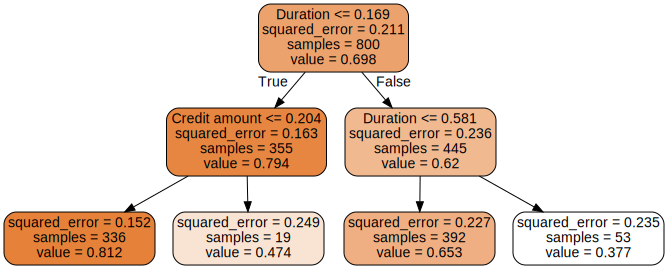

In [80]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_train_norm, y_train)


dot_data = export_graphviz(tree, out_file="tree.dot", filled=True, rounded=True, feature_names=X_train_norm.columns)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# 8.3 Ensemble Methods 

# 8.3.1 Bagging and Pasting (with/without replacement)

In [90]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Bagging 
# Initialize the BaggingClassifier
bagging = BaggingClassifier(base_estimator=base_learner, n_estimators=100, bootstrap=True, random_state=42)
# Fit the BaggingClassifier
bagging.fit(X_train, y_train)

C:\Users\chuan\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [91]:
# Predict and evaluate
y_pred_bagging = bagging.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

print(f"Bagging Accuracy: {accuracy_bagging}")

Bagging Accuracy: 0.665


In [92]:
# Pasting 
# Initialize and train the Pasting model with KNN base estimator
pasting_knn = BaggingClassifier(
    base_estimator=KNeighborsClassifier(n_neighbors=5),
    n_estimators=100,  # Number of base estimators
    max_samples=1.0,  # Number of samples to draw for each base estimator
    bootstrap=False,  # Sample without replacement (Pasting)
    random_state=0
)
pasting_knn.fit(X_train, y_train)

C:\Users\chuan\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=KNeighborsClassifier(), bootstrap=False,
                  n_estimators=100, random_state=0)

In [93]:
# Predict on the test set
y_pred_pasting = pasting_knn.predict(X_test)

In [96]:
# Evaluate the Pasting model
accuracy_pasting = accuracy_score(y_test, y_pred_pasting)
class_report_pasting = classification_report(y_test, y_pred_pasting)
conf_matrix_pasting = confusion_matrix(y_test, y_pred_pasting)

# Print the evaluation results
print(f'Pasting - Accuracy: {accuracy_pasting}')

#print('Pasting - Classification Report:')
#print(class_report_pasting)
#print('Pasting - Confusion Matrix:')
#print(conf_matrix_pasting)

Pasting - Accuracy: 0.65


# 8.3.2 Random Forest 

In [32]:
# Instantiate the model
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.65


# 8.3.3 Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model
gb_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy: {accuracy}")

Gradient Boosting Accuracy: 0.69


# 8.3.4 Adaptive Boosting

In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the AdaBoost classifier with a DecisionTreeClassifier as the base estimator
base_learner = DecisionTreeClassifier(max_depth=1)
ada_clf = AdaBoostClassifier(base_estimator=base_learner, n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model
ada_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = ada_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Accuracy: {accuracy}")

C:\Users\chuan\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Accuracy: 0.705


# 9. Summary of Model Performance

1. Single model 
- KNN: 0.63

- Decision Tree: visualisation

2. Ensembled methods

- Random Forest: 0.65

- Gradient Boosting: 0.69

- Bagging: 0.665
  & Pasting: 0.65

- AdaBoost: 0.705

# 10. Hypermeter Tuning --> by using the best performance model --> AdaBoost: 0.705

# 10.1 Grid Search 

In [35]:
# Initialize the AdaBoost model 
adaboost = AdaBoostClassifier()

In [98]:
# Define the parameter distribution
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0, 10.0],
}

In [99]:
# Initialize RandomizedSearchCV
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

In [100]:
# Fit gridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0, 10.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [101]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy}")

Test Set Accuracy: 0.71


In [102]:
# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Best Score: 0.70375


In [103]:
# Evaluate the best model on the test set
pred = best_model.predict(X_test_norm)

print(f"MAE: {mean_absolute_error(pred, y_test): .2f}")
print(f"RMSE: {mean_squared_error(pred, y_test, squared=False): .2f}")
print(f"R2 score:  {best_model.score(X_test_norm, y_test): .2f}")

MAE:  0.29
RMSE:  0.54
R2 score:   0.71


# 10.2 Random Search

In [42]:
# Initialize the AdaBoost model
adaboost = AdaBoostClassifier()

In [43]:
# Define the parameter distribution
param_dist = {
    'n_estimators': np.arange(50, 301, 50),
    'learning_rate': np.logspace(-2, 1, num=10),
    'algorithm': ['SAMME', 'SAMME.R']
}

In [44]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=adaboost, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)

In [45]:
# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': array([ 0.01      ,  0.02154435,  0.04641589,  0.1       ,  0.21544347,
        0.46415888,  1.        ,  2.15443469,  4.64158883, 10.        ]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300])},
                   random_state=42, scoring='accuracy')

In [46]:
# Best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

Best Parameters: {'n_estimators': 150, 'learning_rate': 0.21544346900318834, 'algorithm': 'SAMME'}
Best Score: 0.7050000000000001


In [47]:
# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy}")

Test Set Accuracy: 0.715


In [48]:
pred = best_model.predict(X_test_norm)

print(f"MAE: {mean_absolute_error(pred, y_test): .2f}")
print(f"RMSE: {mean_squared_error(pred, y_test, squared=False): .2f}")
print(f"R2 score:  {best_model.score(X_test_norm, y_test): .2f}")

MAE:  0.29
RMSE:  0.54
R2 score:   0.71


# 10.3 Summary Hyperparameter Evaluation 

Grid Search result: 

1. Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 50}

2. Best Corss Valudation Score: 0.70375

3. Test Set Accuracy: 0.71

4. MAE: 0.29

5. RMSE: 0.54

6. R2 score: 0.71

Random Search Result: 

1. Best Parameters: {'n_estimators': 150, 'learning_rate': 0.21544346900318834, 'algorithm': 'SAMME'}

2. Best Corss Valudation Score: 0.7050000000000001

3. Test Set Accuracy: 0.715

4. MAE: 0.29

5. RMSE: 0.54

6. R2 score: 0.71

# 11. Overall Conclusion 

# Initial AdaBoost Model Accuracy: 70.5%

This is the baseline performance of your AdaBoost model without any hyperparameter tuning.

# Hyperparameter Tuning 

Model Improvement: Both Grid Search and Random Search improved the performance of the AdaBoost model from the baseline accuracy of 70.5% to around 71-71.5%.

Error Consistency: The error metrics (MAE and RMSE) are consistent, indicating that the models have similar prediction error magnitudes.

Overall, the machine learning predictions are solid, showing good model performance with reasonable error rates and a high proportion of explained variance.

In [81]:
# Save the data 
df_encoded.to_csv('German_credit_analysis_final.csv')